In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
from sklearn.metrics import classification_report#这个包是评价报告

In [111]:
data=sio.loadmat("F:\h\吴恩达\ex5data1.mat")

In [112]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [113]:
X_train=data['X']
data['X'].shape

(12, 1)

In [114]:
y_train=data['y']
data['y'].shape

(12, 1)

In [115]:
X_test=data['Xtest']
data['Xtest'].shape

(21, 1)

In [116]:
y_test=data['ytest']
data['ytest'].shape

(21, 1)

In [117]:
X_val=data['Xval']
data['Xval'].shape

(21, 1)

In [118]:
y_val=data['yval']
data['yval'].shape

(21, 1)

In [119]:
X_train=np.insert(X_train,0,1,axis=1)
X_val=np.insert(X_val,0,1,axis=1)
X_test=np.insert(X_test,0,1,axis=1)

In [120]:
def plotdraw():
    fig,ax=plt.subplots()
    ax.scatter(X_train[:,1],y_train,marker='x')
    ax.set(xlabel="lavel", ylabel="water flowing")
    

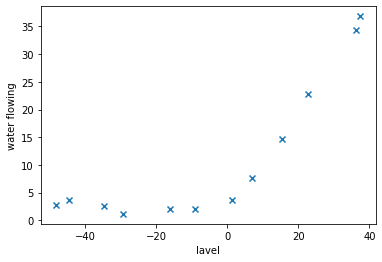

In [121]:
plotdraw()

In [122]:
def reg_cost(theta,X,y,lamda):
    cost=np.sum(np.power((X@theta-y.flatten()),2))
    reg=theta[1:]@theta[1:]*lamda
    return (cost+reg)/(2*len(X))

In [123]:
theta=np.ones(X_train.shape[1])
lamda=1
reg_cost(theta,X_train,y_train,lamda)


303.9931922202643

In [124]:
def reg_grade(theta,X,y,lamda):
    grad=(X@theta-y.flatten())@X
    reg=lamda*theta
    reg[0]=0
    return (grad+reg)/(len(X))

In [125]:

reg_grade(theta,X_train,y_train,lamda)

array([-15.30301567, 598.25074417])

In [126]:
def training_model(X,y,lamda):
    theta=np.ones(X.shape[1])
    res=minimize(fun=reg_cost,x0=theta,args=(X,y,lamda),method='TNC',jac=reg_grade)
    return res.x

In [127]:
final_theta=training_model(X_train,y_train,lamda=0)#保证上述的theta的位置在参数的第一个位置
final_theta.shape
X_train@final_theta

array([ 7.22669531,  2.36604366, 26.3976684 , 26.87675187, -4.58713543,
        9.79942144, 18.7177923 ,  0.32366018, 13.59880611, -3.23552115,
       15.6673244 , 21.45957031])

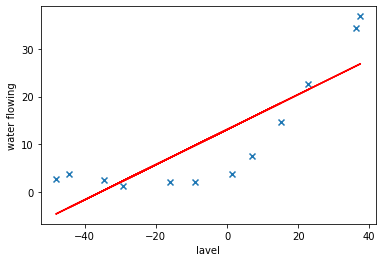

In [128]:
# plotdraw(X_train,y_train)
# fig,ax=plt.subplots()

# ax.scatter(data['X'],data['y'],c='r',marker='x')
# ax.set(xlabel="lavel", ylabel="water flowing")
plotdraw()
plt.plot(X_train[:,1],X_train@final_theta,c='r')
plt.show()

In [129]:
X_val.shape

(21, 2)

训练样本从1开始递增，比较训练 样本和测试样本上损失函数的变化情况

In [134]:
#把测试集和训练集损失函数的值计算出来
def plot_curve(X_train,y_train,X_val,y_val,lamda):
    training_cost=[]
    cv_cost=[]
    x=range(1,len(X_train)+1)

    for i in x :
        res=training_model(X_train[:i,:],y_train[:i,:],lamda)
        training_cost_i= reg_cost(res,X_train[:i,:],y_train[:i,:],lamda)
        cv_cost_i= reg_cost(res,X_val,y_val,lamda)
        training_cost.append(training_cost_i)
        cv_cost.append(cv_cost_i)
    plt.plot(x,training_cost,label="training cost")
    plt.plot(x,cv_cost,label="cv cost")
    plt.legend()
    plt.xlabel("number of examples")
    plt.ylabel("error")
    plt.show()       


            
            
    
    

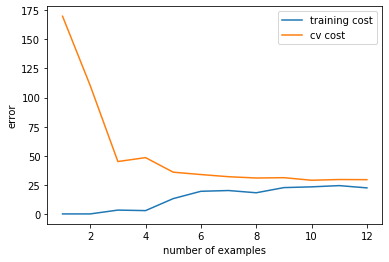

In [135]:
plot_curve(X_train,y_train,X_val,y_val,lamda=0)

hθ(x) = θ0 + θ1 ∗ (waterLevel) + θ2 ∗ (waterLevel)2 + · · · + θp ∗ (waterLevel)p = θ0 + θ1x1 + θ2x2 + ... + θpxp.
高偏差：引入相关特征，采用多项式特征，减少正则化参数lamda

高方差（过拟合）采集更多的样本数据，减少多项式特征，去除非主要的特征，增大正则化参数lamda

In [ ]:
#在此处  采用多项式特征

In [138]:
def plot_feature(X,power):
    for i in range(2,power+1):
        X=np.insert(X,X.shape[1],np.power(X[:,1],i),axis=1)
    return X
        

In [139]:
#对归一化处理,标椎化处理
X_train.shape

(12, 2)

In [140]:
def get_mean_std(X):
    means=np.mean(X,axis=0)
    stds=np.std(X,axis=0)
    return means,stds

In [141]:
def feature_moralization(X,means,stds):
    X[:,1:]=(X[:,1:]-means[1:])/stds[1:]
    return X

In [142]:
power=6

In [143]:
X_train_plo=plot_feature(X_train,power)
X_val_plo=plot_feature(X_val,power)
X_test_plo=plot_feature(X_test,power)

In [157]:
train_means,train_stds=get_mean_std(X_train_plo) 
val_means,val_stds=get_mean_std(X_val_plo)
test_means,test_stds=get_mean_std(X_test_plo)

In [158]:
X_train_morm=feature_moralization(X_train_plo,train_means,train_stds)
X_val_morm=feature_moralization(X_val_plo,val_means,val_stds)
X_test_morm=feature_moralization(X_test_plo,test_means,test_stds)

In [146]:
theta_fit=training_model(X_train_morm,y_train,lamda=0)

In [147]:
theta_fit

array([ 11.21759257,  10.88482541,  12.85770051,  10.2965293 ,
        -4.18366197, -11.4275422 ,  -4.92081021])

In [148]:
def plot_data():
    fig,ax=plt.subplots()
    ax.scatter(X_train[:,1],y_train)
    ax.set(xlabel="change in water level",ylabel="water flowing")

In [149]:
def plot_fit():
#     plotdraw(X_train,y_train)
    plot_data()
    x=np.linspace(-60,60,100)
    xx=x.reshape(100,1)
    xx=np.insert(xx,0,1,axis=1)
    xx=plot_feature(xx,power)
    xx=feature_moralization(xx,train_means,train_stds)
   
    plt.plot(x,xx@theta_fit,'r--',label='xian')
    plt.legend()
    plt.show()

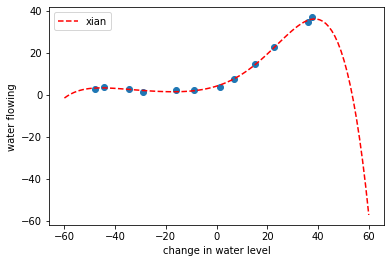

In [150]:
plot_fit()

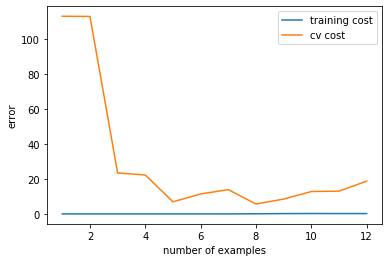

In [153]:
plot_curve(X_train_morm,y_train,X_val_morm,y_val,lamda=0)

In [154]:
#上面发生了过拟合

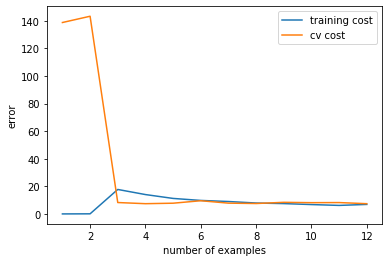

In [155]:
plot_curve(X_train_morm,y_train,X_val_morm,y_val,lamda=1)

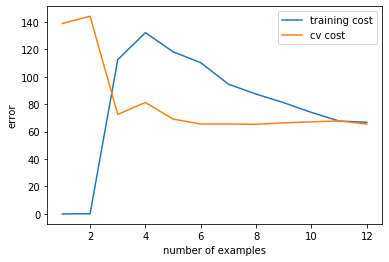

In [156]:
plot_curve(X_train_morm,y_train,X_val_morm,y_val,lamda=100)

In [159]:
lamdas=[0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
trainming_cost=[]
cv_cost=[]
for lamda in lamdas:
    res=training_model(X_train_morm,y_train,lamda)
    tc=reg_cost(res,X_train_morm,y_train,lamda)
    cv=reg_cost(res,X_val_morm,y_val,lamda)
    trainming_cost.append(tc)
    cv_cost.append(cv)

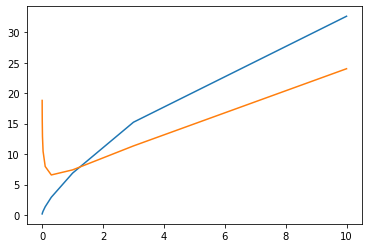

In [160]:
plt.plot(lamdas,trainming_cost,label="training cost")
plt.plot(lamdas,cv_cost,label="cv cost")
plt.show()

In [161]:
lamdas[np.argmin(cv_cost)]

0.3

In [163]:
res=training_model(X_test_morm,y_test,lamda=0.3)
test_cost=reg_cost(res,X_test_morm,y_test,lamda=0)


In [164]:
test_cost

1.9242097411311287